# **Lab 7: Decision Trees**

## Workings Of Decision Tree
* At the root node decision tree selects feature to split the data in two major categories.
* So at the end of root node we have two decision rules and two sub trees
* Data will again be divided in two categories in each sub tree
* This process will continue until every training example is grouped together.
* So at the end of decision tree we end up with leaf node. Which represent the class or a continuous value that we are trying predict

## Criteria To Split The Data
The objective of decision tree is to split the data in such a way that at the end we have different groups of data which has more similarity and less randomness/impurity. In order to achieve this, every split in decision tree must reduce the randomness.
Decision tree uses 'entropy' or 'gini' selection criteria to split the data.
Note: We are going to use sklearn library to test classification. 'entropy' or 'gini' are selection criteria for classifier.
### Entropy
In order to find the best feature which will reduce the randomness after a split, we can compare the randomness before and after the split for every feature. In the end we choose the feature which will provide the highest reduction in randomness. Formally randomness in data is known as 'Entropy' and difference between the 'Entropy' before and after split is known as 'Information Gain'. Since in case of decision tree we may have multiple branches, information gain formula can be written as,

```
    Information Gain= Entropy(Parent Decision Node)–(Average Entropy(Child Nodes))
```

'i' in below Entropy formula represent the target classes 

   ![entropy_formula](https://raw.githubusercontent.com/satishgunjal/images/master/entropy_formula.png)

So in case of 'Entropy', decision tree will split the data using the feature that provides the highest information gain.

### Gini
In case of gini impurity, we pick a random data point in our dataset. Then randomly classify it according to the class distribution in the dataset. So it becomes very important to know the accuracy of this random classification. Gini impurity gives us the probability of incorrect classification. We’ll determine the quality of the split by weighting the impurity of each branch by how many elements it has. Resulting value is called as 'Gini Gain' or 'Gini Index'. This is what’s used to pick the best split in a decision tree. Higher the Gini Gain, better the split

'i' in below Gini formula represent the target classes 

   ![gini_formula](https://raw.githubusercontent.com/satishgunjal/images/master/gini_formula.png)

So in case of 'gini', decision tree will split the data using the feature that provides the highest gini gain.

### So Which Should We Use?
Gini impurity is computationally faster as it doesn’t require calculating logarithmic functions, though in reality neither metric results in a more accurate tree than the other. Here we will use entropy in this lab. 

# Advantages Of Decision Tree
* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* Able to handle both numerical and categorical data.
* Able to handle multi-output problems.
* Uses a white box model. Results are easy to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

# Disadvantages Of Decision Tree
* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

# Classification Problem Example
For classification exercise we are going to use sklearns iris plant dataset.
Objective is to classify iris flowers among three species (setosa, versicolor or virginica) from measurements of length and width of sepals and petals

## Understanding the IRIS dataset
* iris.DESCR > Complete description of dataset
* iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
* iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']
* iris.filename > CSV file name
* iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
* iris.target_names > the meaning of the features. It's an array >> ['setosa', 'versicolor', 'virginica']

From above details its clear that X = 'iris.data' and y= 'iris.target'

![Iris_setosa](https://raw.githubusercontent.com/satishgunjal/images/master/iris_species.png)

<sub><sup>Image from [Machine Learning in R for beginners](https://www.datacamp.com/community/tutorials/machine-learning-in-r)</sup></sub>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz

### **Question: List the purpose of each library in comments in the code above**

Pandas: The powerful data manipulation library Pandas offers data structures for organising and assessing structured data, such as DataFrames.
NumPy: NumPy is a fundamental Python library for computing numbers. It can handle large, multi-dimensional arrays and matrices and offers a variety of mathematical operations for efficient array manipulation.
Datasets for sklearn: The scikit-learn (sklearn) datasets module provides a range of virtual and real-world datasets for testing and practising machine learning algorithms. These datasets are widely used in research and teaching contexts.
sklearn.model_selection: The scikit-learn model_selection module provides methods for evaluating the effectiveness of machine learning models, including cross-validation and tools for splitting datasets into training and testing sets.
Scikit-learn's tree module, sklearn.tree, provides functions and classes for working with decision tree-based machine learning algorithms. One example of a decision tree classifier implementation is the DecisionTreeClassifier from Scikit-Learn.
sklearn.model_selection.train_test_split: Use the train_test_split function to split a dataset into training and testing subsets. It is widely used in machine learning to assess how well a model performs on unobserved data.
matplotlib.pyplot: Matplotlib is a popular Python data visualisation tool. For creating various types of plots and charts, a high-level interface is provided by the Matplotlib pyplot module. 
graphviz: The primary use case for the graphviz library, which is used to generate and display graph structures, is decision tree visualisation. When displaying the structure of decision tree models, it can be extremely useful.


## Load The Data

In [2]:
iris = datasets.load_iris()
print('Dataset structure= ', dir(iris))

Dataset structure=  ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['flower_species'] = df.target.apply(lambda x : iris.target_names[x]) # Each value from 'target' is used as index to get corresponding value from 'target_names' 

print('Unique target values=',df['target'].unique())

df.sample(5)

Unique target values= [0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_species
59,5.2,2.7,3.9,1.4,1,versicolor
130,7.4,2.8,6.1,1.9,2,virginica
89,5.5,2.5,4.0,1.3,1,versicolor
129,7.2,3.0,5.8,1.6,2,virginica
90,5.5,2.6,4.4,1.2,1,versicolor


## **Question: What is target column and why it is created?**

The target column is column with heading 'target'. the target column is created to store numeric representation of the species. In this data set, the species are already encoded as integers with values 0,1 and 2 to setosa, versicolor and virginica respectively. It is basically mapping of these numeric values. It makes it compatible with machine learning algorithms.

## **Question: List the mapping of different target labels w.r.t. the flower specie.**  

In [4]:
#Print the shape of the data using the shape attribute
print("Shape of the DataFrame: ", df.shape)

Shape of the DataFrame:  (150, 6)


## **Question: From the above result, write the number of instances in the dataset**

In [5]:
#Print the top five samples of specie 1
versicolor_samples = df[df['target'] == 1].head(5)
print(versicolor_samples)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target flower_species  
50       1     versicolor  
51       1     versicolor  
52       1     versicolor  
53       1     versicolor  
54       1     versicolor  


In [6]:
#Print the top five samples of specie 2
virginica_samples = df[df['target'] == 2].head(5)
print(virginica_samples)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target flower_species  
100       2      virginica  
101       2      virginica  
102       2      virginica  
103       2      virginica  
104       2      virginica  


In [7]:
#Print the top five samples of specie 3
setosa_samples = df[df['target'] == 0].head(5)
print(setosa_samples)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_species  
0       0         setosa  
1       0         setosa  
2       0         setosa  
3       0         setosa  
4       0         setosa  


### View summary of dataset

In [8]:
#Print the overall summary of the dataset using pandas info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   flower_species     150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [9]:
##check the distribution of species in the data using panadas value_count method. 
species_distribution = df['flower_species'].value_counts()
print(species_distribution)

flower_species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## **Question: Whats is the class distribution of each specie of flower in the dataset. Is the data evenly distributed or not?**

In [10]:
#Check whether the data contains any missing vakues or not, by using the panadas dataframe isnull method. 
missing_values = df.isnull().sum()
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
flower_species       0
dtype: int64


##**Question: Do you find any misssing values in the data?** 

No, there are no null or missing values in dataset. The dataset is complete.

## Build Machine Learning Model

In [11]:
#Lets create feature matrix X  and y labels
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df[['target']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (150, 4)
y shape= (150, 1)


### Create Test And Train Dataset
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
* We will keep 20% of data for testing and 80% of data for training the model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (120, 4)
X_test dimension=  (30, 4)
y_train dimension=  (120, 1)
y_train dimension=  (30, 1)


Now lets train the model using Decision Tree

In [13]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
You are reuesyed to use 'entropy' criteria in the lab
"""
cls = DecisionTreeClassifier(criterion='entropy', random_state=42)
# Fit the model using the fit method
cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Testing The Model
* For testing we are going to use the test data only
* Question: Predict the species of 10th, 20th and 29th test example from test data

In [14]:
example_10 = X_test.iloc[[10]]
example_20 = X_test.iloc[[20]]
example_29 = X_test.iloc[[29]]

# Make predictions
prediction_10 = cls.predict(example_10)
prediction_20 = cls.predict(example_20)
prediction_29 = cls.predict(example_29)

# Print the predictions
print("Prediction for 10th example:", prediction_10)
print("Prediction for 20th example:", prediction_20)
print("Prediction for 29th example:", prediction_29)

Prediction for 10th example: [2]
Prediction for 20th example: [0]
Prediction for 29th example: [0]


### Model Score
Check the model score using test data

In [15]:
#Check model accuracy using the score method.
accuracy = cls.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 100.00%


## Visualize The Decision Tree
We will use plot_tree() function from sklearn to plot the tree and then export the tree in Graphviz format using the export_graphviz exporter. Results will be saved in iris_decision_tree.pdf file

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsa

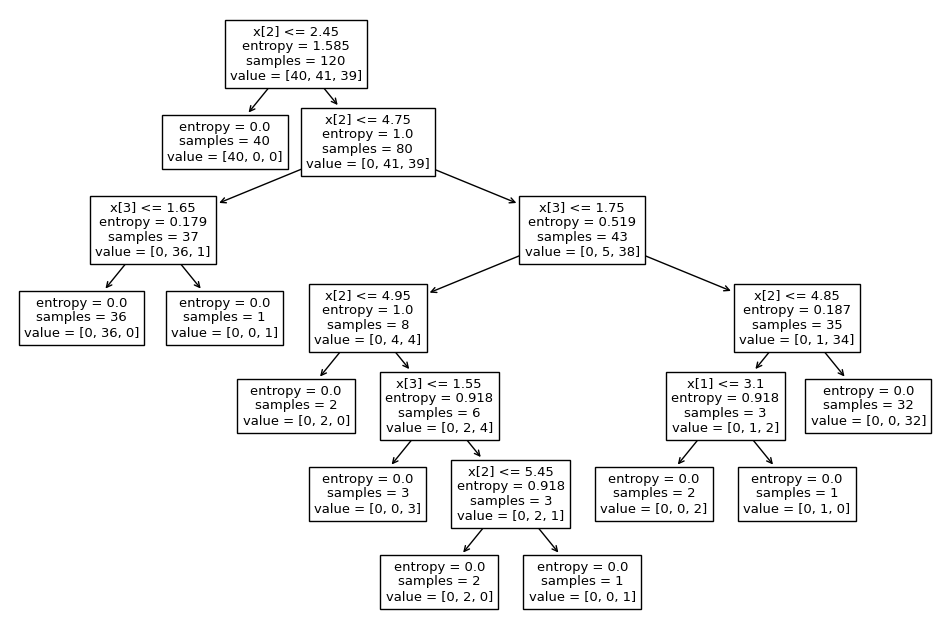

In [16]:
plt.figure(figsize=(12,8))
tree.plot_tree(cls) 

In [17]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris_decision_tree") 

'iris_decision_tree.pdf'

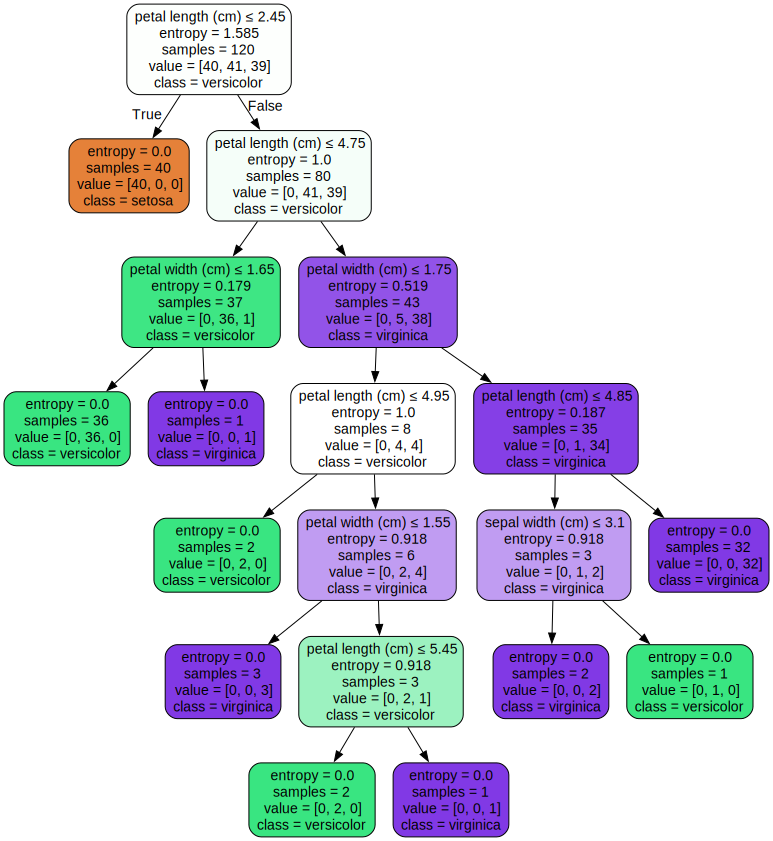

In [18]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 